In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
#Columns Histplot

In [11]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

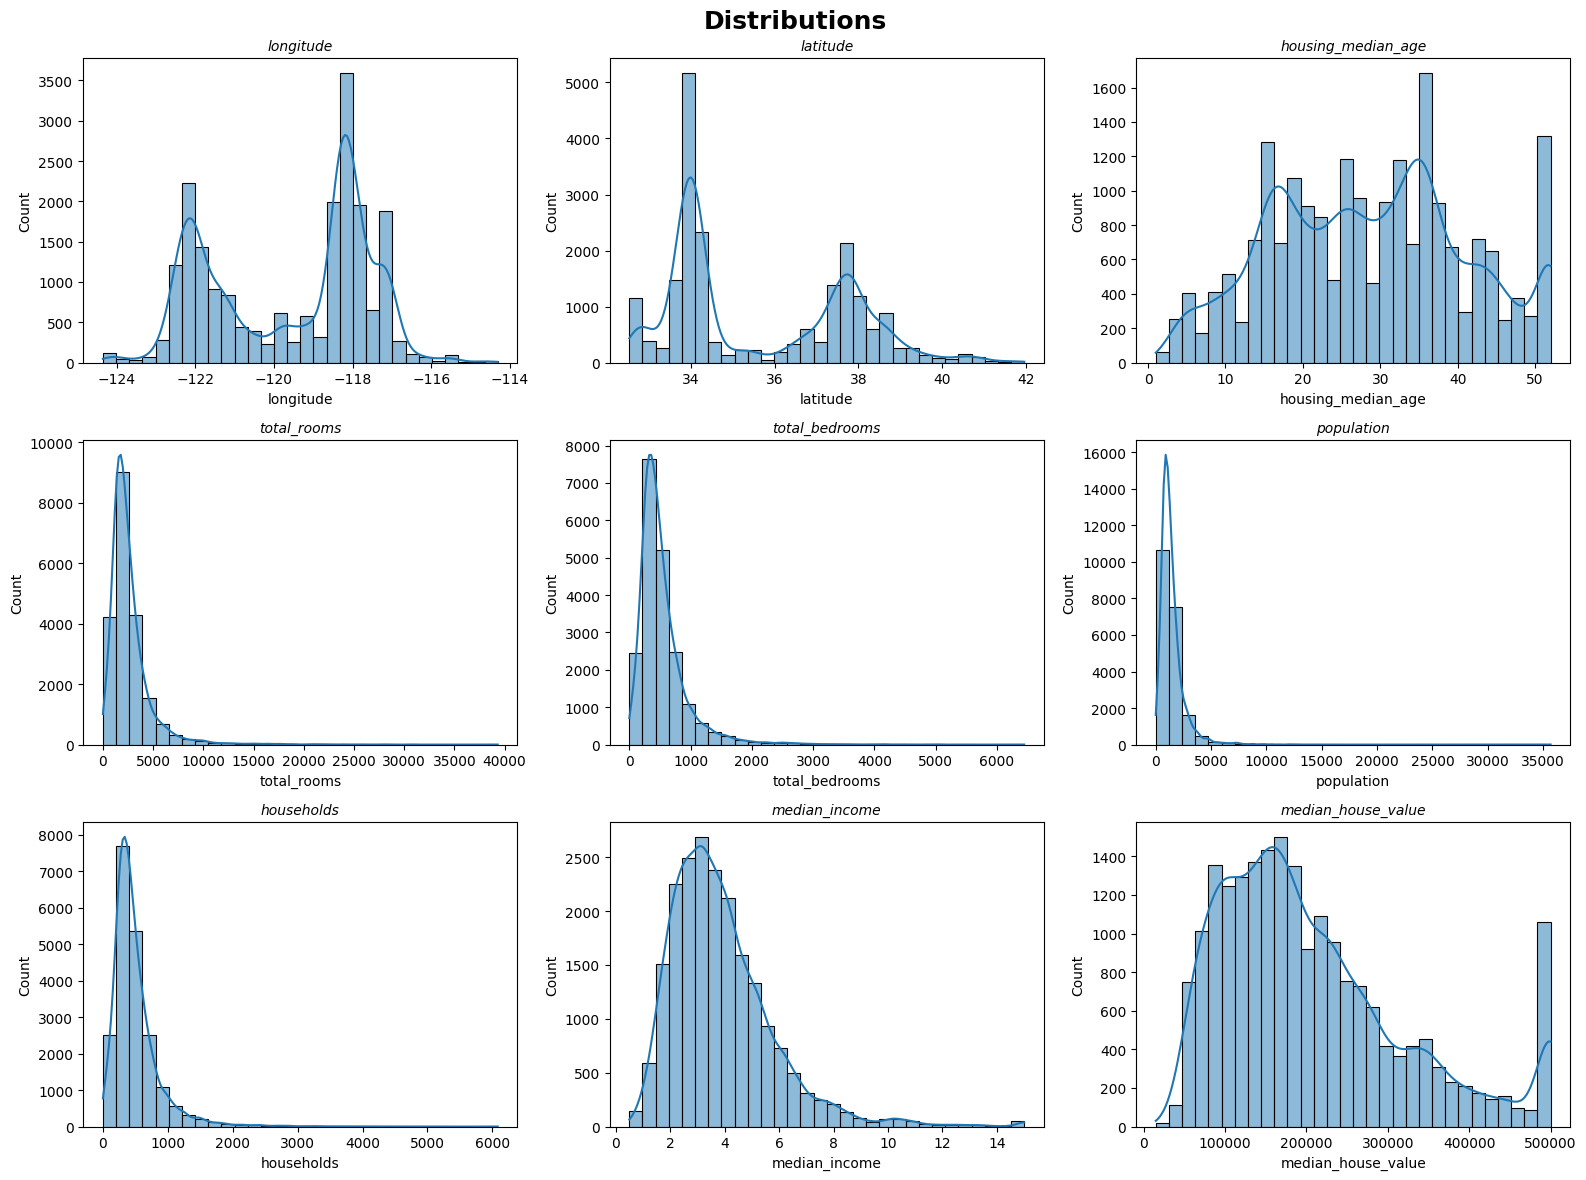

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,12))
fig.suptitle("Distributions", fontsize=18, fontweight="bold")

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle="italic")

plt.tight_layout()
plt.show()

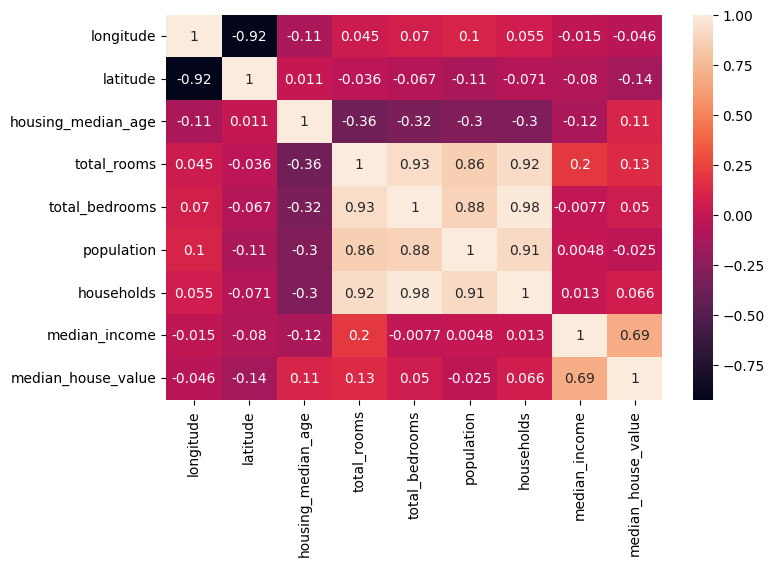

In [13]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [14]:
def find_outliers_iqr(df: pd.DataFrame, threshold: float = 1.5):
    outlier_summary = {}

    numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary[col] = {
            "outlier_count": len(outliers),
            "outlier_percentage": 100 * outliers.shape[0] / df.shape[0],
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }

    return pd.DataFrame(outlier_summary)

In [15]:
find_outliers_iqr(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [16]:
def remove_outliers_from_column(df: pd.DataFrame, target_col, threshold:float = 1.5):
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

    return outliers

In [18]:
print("original:", df.shape)

df_target_clean = remove_outliers_from_column(df, target_col="median_house_value")

print("cleaned:", df_target_clean.shape)

original: (20640, 10)
cleaned: (19569, 10)


In [20]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19369.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,539.893335,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,422.650225,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,648.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [22]:
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

C:\Users\EXPORT\AppData\Local\Temp\ipykernel_8472\3688706348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())


In [23]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000,19569.000000
mean,-119.562786,35.654159,28.352752,2619.977260,538.841739,1442.788952,501.394859,3.665568,190852.301906
std,2.005764,2.151007,12.497772,2183.419302,420.612109,1145.011369,383.396308,1.557927,95438.555669
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,299.000000,797.000000,282.000000,2.522700,116200.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.441200,173200.000000
75%,-117.990000,37.730000,37.000000,3123.000000,645.000000,1749.000000,606.000000,4.572100,246700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


In [24]:
df_target_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [25]:
df_target_clean["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8552
INLAND        6519
NEAR OCEAN    2419
NEAR BAY      2074
ISLAND           5
Name: count, dtype: int64

In [ ]:
df_target_clean = pd.get_dummies(df_target_clean, columns=["ocean_proximity"], drop_first=True)

In [27]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [29]:
X = df_target_clean.drop("median_house_value", axis=1)

y = df_target_clean["median_house_value"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [32]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)

    return mae, mse, rmse, r2

In [36]:
models = {
    "linear": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "kneighbors": KNeighborsRegressor(),
    "decision tree": DecisionTreeRegressor(),
    "adaboost": AdaBoostRegressor(),
    "gradient boosting": GradientBoostingRegressor(),
    "random forest": RandomForestRegressor(),
    "xgb": XGBRegressor()
}

In [38]:
for i in range(len(list(models))):
    model = list(models.values())[i]

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(list(models.keys())[i])

    mae, mse, rmse, r2 = evaluate_model(y_train, y_train_pred)

    print("---Train Metrics---")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)


    print("\n---Test Metrics---")
    
    mae, mse, rmse, r2 = evaluate_model(y_test, y_test_pred)

    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

    print("--------------------------------------------")

linear
---Train Metrics---
MAE: 43858.38748241092
MSE: 3525640708.5348454
RMSE: 59377.105929262376
R2 Score: 0.6104236470924751

---Test Metrics---
MAE: 43594.36386300802
MSE: 3453859684.8388395
RMSE: 58769.54725739207
R2 Score: 0.6263296157229532
--------------------------------------------
ridge
---Train Metrics---
MAE: 43864.6773149373
MSE: 3526123193.811098
RMSE: 59381.168680071445
R2 Score: 0.6103703334199277

---Test Metrics---
MAE: 43597.1429124486
MSE: 3453203142.73881
RMSE: 58763.961258060284
R2 Score: 0.6264006465004597
--------------------------------------------
lasso
---Train Metrics---
MAE: 43859.008585346324
MSE: 3525645308.991426
RMSE: 59377.144668562716
R2 Score: 0.6104231387510857

---Test Metrics---
MAE: 43594.66878006596
MSE: 3453732161.6263247
RMSE: 58768.46230442247
R2 Score: 0.6263434123598096
--------------------------------------------
kneighbors
---Train Metrics---
MAE: 56469.60021901007
MSE: 5210333149.503497
RMSE: 72182.63745183808
R2 Score: 0.42426845114904

In [39]:
param_grid = {
    "learning_Rate": [0.01, 0.1],
    "max_depth": [5, 8, 12],
    "n_estimators": [100, 200, 500],
    "colsample_bytree": [0.3, 0.4, 0.8, 1]
}

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
rscv = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_grid, cv=5, n_jobs=-1)

In [42]:
rscv.fit(X_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.3, 0.4, ...], 'learning_Rate': [0.01, 0.1], 'max_depth': [5, 8, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [43]:
rscv.best_params_

{'n_estimators': 200,
 'max_depth': 5,
 'learning_Rate': 0.01,
 'colsample_bytree': 0.8}

In [44]:
y_train_pred = rscv.predict(X_train)
y_test_pred = rscv.predict(X_test)


mae, mse, rmse, r2 = evaluate_model(y_train, y_train_pred)

print("---Train Metrics---")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


print("\n---Test Metrics---")

mae, mse, rmse, r2 = evaluate_model(y_test, y_test_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

---Train Metrics---
MAE: 17760.021039795956
MSE: 608802918.0356652
RMSE: 24673.93195329162
R2 Score: 0.9327284768769429

---Test Metrics---
MAE: 28802.325583375914
MSE: 1757087258.2147033
RMSE: 41917.62467285931
R2 Score: 0.8099021005782326


In [45]:
#let's tweak the hyperparameters by hand and see if we arrive at a better model

In [69]:
xgb = XGBRegressor(n_estimators= 300, max_depth=5, colsample_bytree=0.7, learning_rate=0.1)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)


mae, mse, rmse, r2 = evaluate_model(y_train, y_train_pred)

print("---Train Metrics---")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


print("\n---Test Metrics---")

mae, mse, rmse, r2 = evaluate_model(y_test, y_test_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

---Train Metrics---
MAE: 21855.87075311519
MSE: 955659622.5683395
RMSE: 30913.74488101271
R2 Score: 0.8944014943213333

---Test Metrics---
MAE: 28681.660303291603
MSE: 1746791597.4635835
RMSE: 41794.635989126444
R2 Score: 0.811015980081255
